In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import time 
%matplotlib inline

# import data 

In [36]:
df = pd.read_excel(r'C:/Users/Acer/Downloads/DataBreaches.xlsx',index_col=0)

In [37]:
df.head()

,alternative_name,records_lost,YEAR,story,SECTOR,METHOD,interesting story,DATA_SENSITIVITY,DISPLAYED RECORDS,source_name,1st source link,2nd source link
Entity,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,web\nhealthcare\napp\nretail\ngaming\ntranspor...,poor security\nhacked\noops!\nlost device \nin...,NaN,1. Just email address/Online information \n2 S...,"=IF(C3>100000000,C3,"")",NaN,NaN,NaN
US Customs and Border Protection,NaN,100000.0,2019.0,June 2019. Photos of travellers' faces and lic...,government,hacked,y,2,NaN,Washington Post,https://www.washingtonpost.com/technology/2019...,NaN
Click2Gov,NaN,300000.0,2018.0,"Dec 2018. Vulnerabilities in Click2Gov, a type...",financial,hacked,NaN,3,NaN,Fortune,http://fortune.com/2018/12/18/click2gov-local-...,NaN
SingHealth,NaN,1500000.0,2018.0,July 2018. Hackers stole personal details of 1...,healthcare,hacked,NaN,4,NaN,Straits Times,https://www.straitstimes.com/singapore/persona...,NaN
Quest Diagnostics,NaN,11900000.0,2019.0,June 2019. One of the biggest blood testing pr...,healthcare,poor security,NaN,4,NaN,NBC News,https://www.nbcnewyork.com/news/local/Quest-Di...,NaN


# Data description
# calling describe method 
 

In [38]:
desc = df.describe()

In [39]:
desc

,records_lost,YEAR
count,3.380000e+02,339.000000
mean,4.008553e+07,2013.752212
std,1.443840e+08,3.835827
min,0.000000e+00,1999.000000
25%,4.275000e+05,2011.000000
50%,3.000000e+06,2014.000000
75%,1.800000e+07,2017.000000
max,1.370000e+09,2019.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, nan to AOL
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alternative_name   136 non-null    object 
 1   records_lost       338 non-null    float64
 2   YEAR               339 non-null    float64
 3   story              339 non-null    object 
 4   SECTOR             340 non-null    object 
 5   METHOD             340 non-null    object 
 6   interesting story  69 non-null     object 
 7   DATA_SENSITIVITY   340 non-null    object 
 8   DISPLAYED RECORDS  33 non-null     object 
 9   source_name        339 non-null    object 
 10  1st source link    339 non-null    object 
 11  2nd source link    32 non-null     object 
dtypes: float64(2), object(10)
memory usage: 34.5+ KB


In [41]:
df.dtypes

alternative_name      object
records_lost         float64
YEAR                 float64
story                 object
SECTOR                object
METHOD                object
interesting story     object
DATA_SENSITIVITY      object
DISPLAYED RECORDS     object
source_name           object
1st source link       object
2nd source link       object
dtype: object

# Data Cleasnisng & validation

In [42]:
#remove null values
df = pd.read_excel(r'C:/Users/Acer/Downloads/DataBreaches.xlsx',index_col=0,na_values=['n/a'] )

In [43]:
# Remove the columns
df1 = df.drop(columns=['alternative_name', 'interesting story', '1st source link','2nd source link','DISPLAYED RECORDS'], axis=1).sample(100)

In [44]:
df1.head()

,records_lost,YEAR,story,SECTOR,METHOD,DATA_SENSITIVITY,source_name
Entity,,,,,,,
Gamigo,8000000.0,2012.0,Jul 2012. 4 months after the gaming site Gamig...,web,hacked,1,Forbes
RootsWeb,300000.0,2017.0,Dec 2017. Ancestry.com's community-driven site...,web,poor security,4,Threat Post
KT Corp.,8700000.0,2012.0,Jul 2012. Two suspects reportedly earnt an est...,telecoms,hacked,2,"Korea Times, CNet"
Privatization Agency of the Republic of Serbia,5190396.0,2014.0,Dec 2014. A text file with personal data and f...,government,oops!,2,Poverenik
Instagram,6000000.0,2017.0,Sep 2017. A bug exposed user's contact informa...,web,hacked,1,The Verge


In [45]:
df1.isnull().sum()

records_lost        0
YEAR                0
story               0
SECTOR              0
METHOD              0
DATA_SENSITIVITY    0
source_name         0
dtype: int64

In [46]:
import re

# Remove punctuation
df1['story'] = \
df1['story'].map(lambda x: re.sub('[,\.!?]', '', x))

# Print out the first rows of papers
df1['story'].head()

Entity
Gamigo                                            Jul 2012 4 months after the gaming site Gamigo...
RootsWeb                                          Dec 2017 Ancestrycom's community-driven site R...
KT Corp.                                          Jul 2012 Two suspects reportedly earnt an esti...
Privatization Agency of the Republic of Serbia    Dec 2014 A text file with personal data and fi...
Instagram                                         Sep 2017 A bug exposed user's contact informat...
Name: story, dtype: object

# Check missing info

In [47]:
missing_info = list(df1.columns[df1.isnull().any()])

In [48]:
missing_info

[]

In [49]:
for col in missing_info:
    num_missing = df1[df1[col].isnull() == True].shape[0]
    print('number missing for column {}: {}'.format(col, 
                                                    num_missing))

# Check the correlation

In [50]:
# validate the cloumns using correlation matrix.
# The statistical relationship between two variables is referred to as their correlation.
# correlation coefficient will always be in the range of -1 to 1.
# minus values means negative relationship betwwen two variables.
# 0 implying no correlation.
# Positive correlations imply that as x increases, so does y. 


In [51]:
df1['story']=df1['story'].astype('category').cat.codes
df1['SECTOR']=df1['SECTOR'].astype('category').cat.codes
df1['METHOD']=df1['METHOD'].astype('category').cat.codes
df1['source_name']=df1['source_name'].astype('category').cat.codes
df1['records_lost']=df1['records_lost'].astype('category').cat.codes
df1['YEAR']=df1['YEAR'].astype('category').cat.codes
df1['DATA_SENSITIVITY']=df1['DATA_SENSITIVITY'].astype('category').cat.codes
df1.corr()


,records_lost,YEAR,story,SECTOR,METHOD,DATA_SENSITIVITY,source_name
records_lost,1.000000,0.283247,0.136146,0.126314,0.070060,-0.094539,0.009581
YEAR,0.283247,1.000000,-0.063531,0.179906,0.154397,-0.038792,0.220061
story,0.136146,-0.063531,1.000000,-0.036152,0.013858,0.094247,-0.238072
SECTOR,0.126314,0.179906,-0.036152,1.000000,-0.190920,-0.385074,-0.025713
METHOD,0.070060,0.154397,0.013858,-0.190920,1.000000,0.039425,0.118612
DATA_SENSITIVITY,-0.094539,-0.038792,0.094247,-0.385074,0.039425,1.000000,-0.055952
source_name,0.009581,0.220061,-0.238072,-0.025713,0.118612,-0.055952,1.000000


# Correlation graph

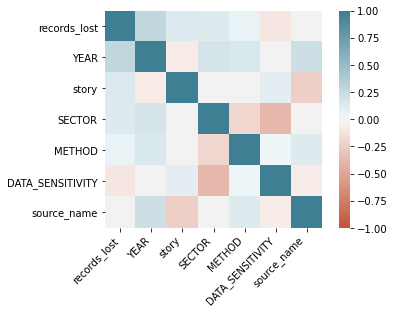

In [52]:
corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [53]:
# Remove the columns
df2 = df.drop(columns=['alternative_name', 'interesting story', '1st source link','2nd source link','DISPLAYED RECORDS','story','SECTOR','METHOD','source_name'], axis=1).sample(100)

In [54]:
df2.head()

,records_lost,YEAR,DATA_SENSITIVITY
Entity,,,
Petflow,0.0,2019.0,1
Snapchat,1700000.0,2017.0,1
Nametests,120000000.0,2018.0,1
Facebook,6000000.0,2013.0,1
Twitter,330000000.0,2018.0,1


# Data Mining -Clustering

In [55]:
from sklearn.cluster import KMeans
df3 = np.array(df2)

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df3)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

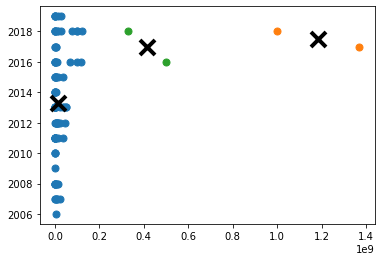

In [56]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = df3[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o', markersize=7)
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=4.0)
plt.show()

# Data Visualization

Text(0, 0.5, 'YEAR')

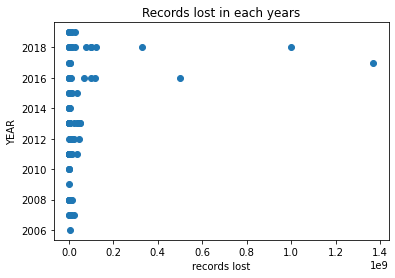

In [57]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df2['records_lost'], df2['YEAR'])
# set a title and labels
ax.set_title('Records lost in each years')
ax.set_xlabel('records lost')
ax.set_ylabel('YEAR')


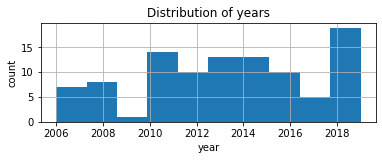

In [58]:
from pandas import Series
from matplotlib import pyplot
ax1 = plt.subplot(211)
ax1.set_title('Distribution of years')
ax1.set_ylabel('count')
ax1.set_xlabel('year')

# second raw 1st column 1st number plot
# plot histogram with time and ASPI value
df2.YEAR.hist()


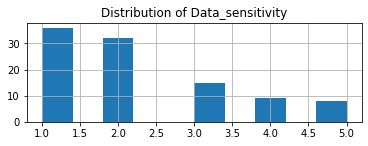

In [59]:
ax1 = plt.subplot(211)
ax1.set_title('Distribution of Data_sensitivity')

df2.DATA_SENSITIVITY.hist()


# Presentation

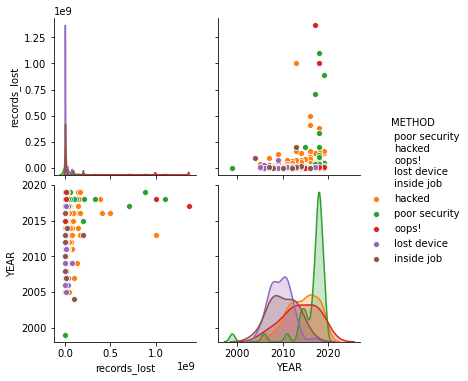

In [74]:

sns.pairplot(df, hue = 'METHOD')